In [1]:
from compute import Var, eqvar, ureg, get_unit, buildidpvars, coupled_run, Evaluable, args_in_order, fill_args, unit_conversion_factors, evaluable_with_unit
from inputresolver import reassigneq, eqvars, eqsonly, default_out, mdf_order, default_in, idx_eqlist
from inputresolver import getallvars, invert_edges, resolve, reassign, flatten_order
from representations import bipartite_repr, drawbipartite, digraph_repr, draw, draw_dsm
from compute_utils import get_outputs, check_eqs, print_out
from partitioner import default_out_condensation, merge
from pprint import pprint
import networkx as nx
import sympy as sp
from sympy.utilities.lambdify import implemented_function
import numpy as np
from scipy import interpolate
import openmdao.api as om
import gpkit as gp
import cvxpy as cp
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [21]:
from monotonicity import get_monotonicites
import pandas as pd

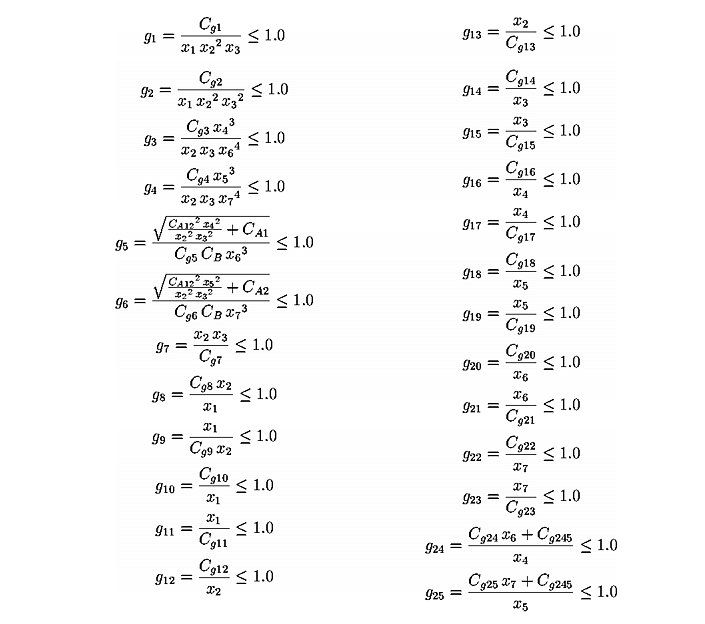
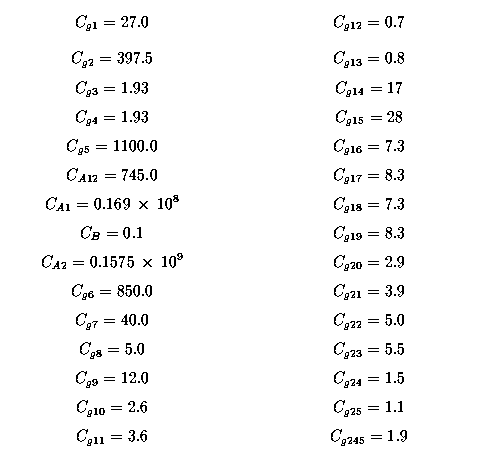

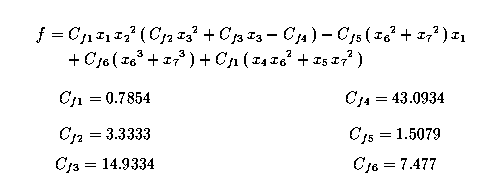

In [2]:
x1 = Var('x_1')
x2 = Var('x_2')
x3 = Var('x_3')
x4 = Var('x_4')
x5 = Var('x_5')
x6 = Var('x_6')
x7 = Var('x_7')

In [23]:
f = 0.7854*x1*x2**2*(3.3333*x3**2+14.9334*x3-43.0934)-1.5079*(x6**2+x7**2)*x1+7.477*(x6**3+x7**3)+0.7854*(x4*x6**2+x5*x7**2)
g1 = 27-x1*x2**2*x3
g2 = 397.5-x1*x2**2*x3**2
g3 = 1.93-x2*x3*x6**4/x4**3
g4 = 1.93-x2*x3*x7**4/x5**3
a1, (_, h5) = eqvar('a_1', 745**2*x4**2/(x2**2*x3**2)+0.169e8)
g5 = a1-1100*0.1*x6**6
a2, (_, h6) = eqvar('a_2', 745**2*x5**2/(x2**2*x3**2)+0.1575e9)
g6 = a2-850*0.01*x7**6
g7 = x2*x3-40
g8 = 5*x2-x1
g9 = x1-12*x2
g10 = (1.5*x6+1.9)/x4
g11 = (1.1*x7+1.9)/x5

In [24]:
h5

16900000.0 + 555025*x_4**2/(x_2**2*x_3**2)

In [26]:
eqlist = [f,g1,g2,g3,g4,h5,g5,h6,g6,g7,g8,g9,g10,g11]
eqs = idx_eqlist(eqlist)

In [27]:
eqs

{0: 0.7854*x_1*x_2**2*(3.3333*x_3**2 + 14.9334*x_3 - 43.0934) - x_1*(1.5079*x_6**2 + 1.5079*x_7**2) + 0.7854*x_4*x_6**2 + 0.7854*x_5*x_7**2 + 7.477*x_6**3 + 7.477*x_7**3,
 1: -x_1*x_2**2*x_3 + 27,
 2: -x_1*x_2**2*x_3**2 + 397.5,
 3: -x_2*x_3*x_6**4/x_4**3 + 1.93,
 4: -x_2*x_3*x_7**4/x_5**3 + 1.93,
 5: 16900000.0 + 555025*x_4**2/(x_2**2*x_3**2),
 6: a_1 - 110.0*x_6**6,
 7: 157500000.0 + 555025*x_5**2/(x_2**2*x_3**2),
 8: a_2 - 8.5*x_7**6,
 9: x_2*x_3 - 40,
 10: -x_1 + 5*x_2,
 11: x_1 - 12*x_2,
 12: (1.5*x_6 + 1.9)/x_4,
 13: (1.1*x_7 + 1.9)/x_5}

In [28]:
data = {key: get_monotonicites(var) for key,var in eqs.items()}
df = pd.DataFrame.from_dict(data, orient='index').fillna('.    ')
df.sort_index()

,x_4,x_3,x_5,x_2,x_7,x_6,x_1,a_1,a_2
0,+,+,+,n,n,n,n,.,.
1,.,-,.,-,.,.,-,.,.
2,.,-,.,-,.,.,-,.,.
3,+,-,.,-,.,-,.,.,.
4,.,-,+,-,-,.,.,.,.
5,+,-,.,-,.,.,.,.,.
6,.,.,.,.,.,-,.,+,.
7,.,-,+,-,.,.,.,.,.
8,.,.,.,.,-,.,.,.,+
9,.,+,.,+,.,.,.,.,.
